In [11]:
!pip install pandas numpy matplotlib scikit-learn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

In [27]:
# Load data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

# Display the first few rows of each dataframe
print("Movies DataFrame:")
print(movies.head())

print("\nRatings DataFrame:")
print(ratings.head())

print("\nTags DataFrame:")
print(tags.head())

print("\nLinks DataFrame:")
print(links.head())


Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

Tags DataFrame:
   userId  movieId          tag   timestamp
0      22    26479  Kevin Kline  1583038886
1      22    79592     misogyny  1

In [29]:
# Display basic information about each DataFrame
print("Movies DataFrame Info:")
print(movies.info())
print("\nRatings DataFrame Info:")
print(ratings.info())
print("\nTags DataFrame Info:")
print(tags.info())
print("\nLinks DataFrame Info:")
print(links.info())

Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None

Ratings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None

Tags DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000072 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3),

In [31]:
# Display descriptive statistics
print("Movies DataFrame Description:")
print(movies.describe(include='all'))

print("\nRatings DataFrame Description:")
print(ratings.describe())

print("\nTags DataFrame Description:")
print(tags.describe(include='all'))

Movies DataFrame Description:
              movieId         title genres
count    87585.000000         87585  87585
unique            NaN         87382   1798
top               NaN  Alone (2020)  Drama
freq              NaN             4  12443
mean    157651.365519           NaN    NaN
std      79013.402099           NaN    NaN
min          1.000000           NaN    NaN
25%     112657.000000           NaN    NaN
50%     165741.000000           NaN    NaN
75%     213203.000000           NaN    NaN
max     292757.000000           NaN    NaN

Ratings DataFrame Description:
             userId       movieId        rating     timestamp
count  3.200020e+07  3.200020e+07  3.200020e+07  3.200020e+07
mean   1.002785e+05  2.931861e+04  3.540396e+00  1.275241e+09
std    5.794905e+04  5.095816e+04  1.058986e+00  2.561630e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    5.005300e+04  1.233000e+03  3.000000e+00  1.051012e+09
50%    1.002970e+05  3.452000e+03  3.500000e+00  1

In [33]:
# Check for missing values
print("Missing values in Movies DataFrame:")
print(movies.isnull().sum())

print("\nMissing values in Ratings DataFrame:")
print(ratings.isnull().sum())

print("\nMissing values in Tags DataFrame:")
print(tags.isnull().sum())


Missing values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64

Missing values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in Tags DataFrame:
userId        0
movieId       0
tag          17
timestamp     0
dtype: int64


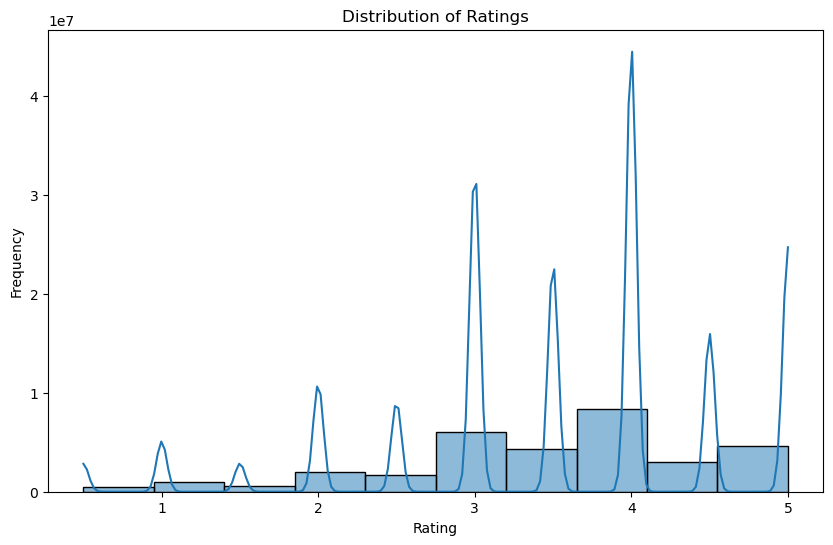

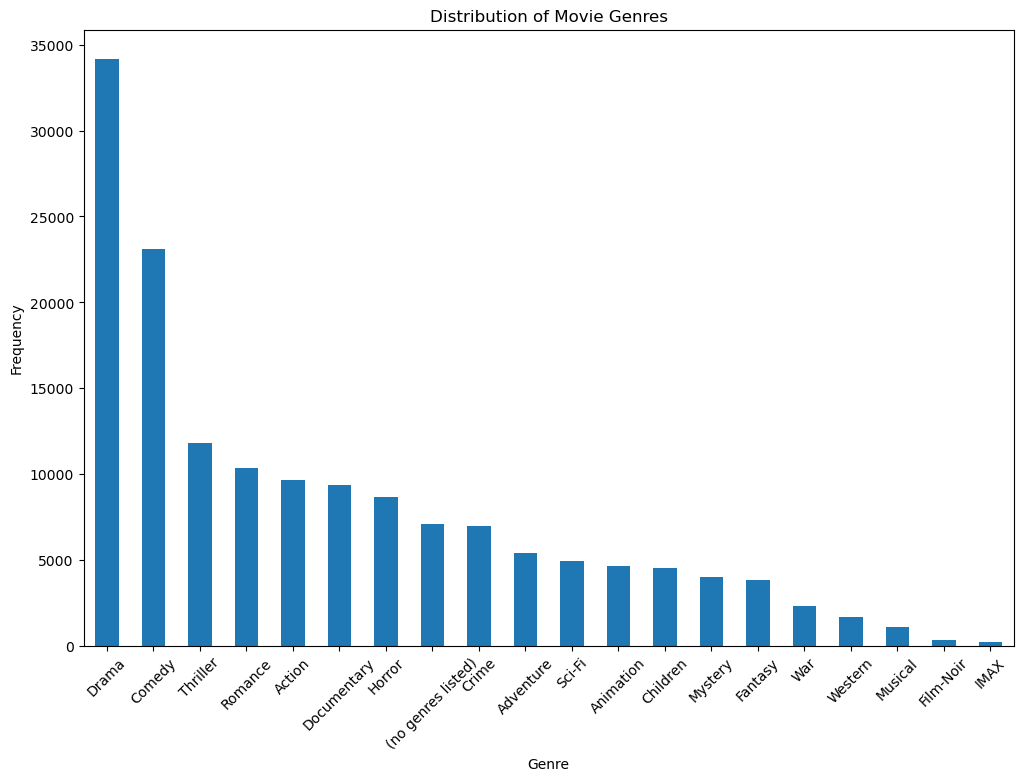

In [35]:
# Import seaborn for better visualizations
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution of movie genres
plt.figure(figsize=(12, 8))
genres = movies['genres'].str.split('|', expand=True).stack().value_counts()
genres.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [37]:
# Example: Check for movies with the highest and lowest ratings
top_rated_movies = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(10)
print("\nTop Rated Movies:")
print(top_rated_movies)

low_rated_movies = ratings.groupby('movieId')['rating'].mean().sort_values().head(10)
print("\nLowest Rated Movies:")
print(low_rated_movies)



Top Rated Movies:
movieId
199103    5.0
268476    5.0
171849    5.0
268054    5.0
268090    5.0
268114    5.0
122649    5.0
225251    5.0
147402    5.0
268438    5.0
Name: rating, dtype: float64

Lowest Rated Movies:
movieId
277496    0.5
277854    0.5
268472    0.5
268494    0.5
268498    0.5
277830    0.5
277828    0.5
277826    0.5
277824    0.5
277822    0.5
Name: rating, dtype: float64


In [39]:
# Display the first few rows of each DataFrame
print("Movies DataFrame Sample:")
print(movies.head())

print("\nRatings DataFrame Sample:")
print(ratings.head())

print("\nTags DataFrame Sample:")
print(tags.head())

print("\nLinks DataFrame Sample:")
print(links.head())


Movies DataFrame Sample:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame Sample:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

Tags DataFrame Sample:
   userId  movieId          tag   timestamp
0      22    26479  Kevin Kline  1583038886
1      22    

In [41]:
# Drop rows with missing values
ratings = ratings.dropna()

# Or fill missing values with a specific value
movies['genres'] = movies['genres'].fillna('Unknown')

In [43]:
# One-hot encoding for genres
genres_encoded = movies['genres'].str.get_dummies('|')
movies = pd.concat([movies, genres_encoded], axis=1)


In [45]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [47]:
from sklearn.model_selection import train_test_split

# Split the ratings data into training and testing sets
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)


In [59]:
# Cek duplikat
duplicate_user_ids = ratings[ratings.duplicated(['userId', 'movieId'], keep=False)]
print("Duplicate Entries:\n", duplicate_user_ids)

# Hapus duplikat jika ada
ratings = ratings.drop_duplicates(['userId', 'movieId'])

Duplicate Entries:
 Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []


In [62]:
# Cek jumlah ratings per user and per movie
print("Ratings per user:", ratings['userId'].value_counts())
print("Ratings per movie:", ratings['movieId'].value_counts())


Ratings per user: userId
175325    33332
17035      9577
55653      9178
123465     9044
171795     9016
          ...  
161168       20
87952        20
187372       20
5564         20
129987       20
Name: count, Length: 200948, dtype: int64
Ratings per movie: movieId
318       102929
356       100296
296        98409
2571       93808
593        90330
           ...  
288825         1
288467         1
287221         1
284087         1
274343         1
Name: count, Length: 84432, dtype: int64


In [66]:
# Ambil subset kecil dari data untuk uji coba
subset_ratings = ratings.sample(n=10000, random_state=42)
rating_matrix_subset = subset_ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
print("Subset Rating Matrix Shape:", rating_matrix_subset.shape)

Subset Rating Matrix Shape: (9166, 3790)


In [74]:
# Tampilkan beberapa baris pertama dari pivot table
print(rating_matrix_subset.head())

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
18          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
24          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
28          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
34          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
94          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  10      11      ...  278446  278800  279484  279812  280218  282083  \
userId                   ...                                                   
18          0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
24          0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
28          0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
34          0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

In [76]:
from scipy.sparse import csr_matrix

# Mengonversi pivot table menjadi sparse matrix
sparse_rating_matrix_subset = csr_matrix(rating_matrix_subset.values)
print("Sparse Rating Matrix Shape:", sparse_rating_matrix_subset.shape)


Sparse Rating Matrix Shape: (9166, 3790)


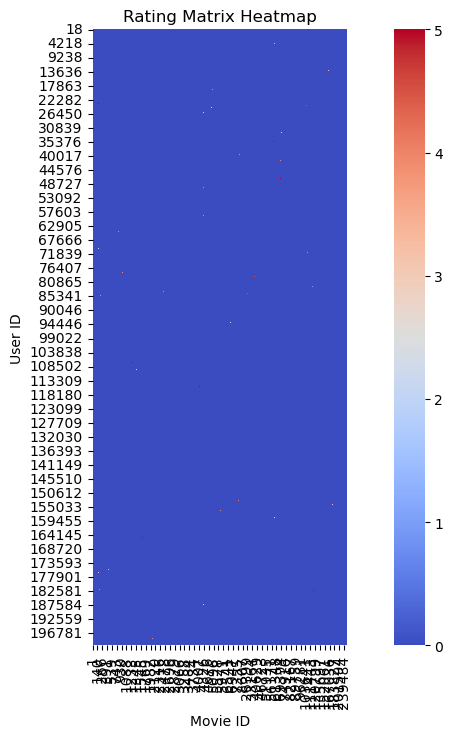

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(rating_matrix_subset, cmap='coolwarm', cbar=True, square=True)
plt.title('Rating Matrix Heatmap')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

In [84]:
pip install --upgrade pip setuptools wheel

  Using cached setuptools-72.2.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 787.7 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/1.8 MB 2.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.8 MB 2.7 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.8 MB 2.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.8 MB 2.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.8 MB 2.9 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 2.8 MB/s eta 0:00:01
   ------------------------- -------------- 1.2/1.8 MB 2.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.3/1.8 MB 3.0 MB/s eta 0:00:01
   ------------------------------- -------- 1

In [96]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Setup Reader untuk Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(subset_ratings[['userId', 'movieId', 'rating']], reader)

# Split data
trainset, testset = train_test_split(data, test_size=0.2)

# Train model
model = SVD()
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate model
print(f"RMSE: {accuracy.rmse(predictions)}")


RMSE: 1.0375
RMSE: 1.0375130291422265


In [123]:
from collections import defaultdict

all_movie_ids = subset_ratings['movieId'].unique()

def get_top_n_recommendations(model, user_id, all_movie_ids, n=10):
    #Membuat prediksi untuk semua film yang belum ditonton oleh user
    user_rated_movies = subset_ratings[subset_ratings['userId'] == user_id]['movieId'].values
    movies_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in user_rated_movies]
    
    predictions = [model.predict(user_id, movie_id) for movie_id in movies_to_predict]
    
    #Mengurutkan berdasarkan estimasi rating dan mengambil top-N
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    # Mengembalikan daftar rekomendasi
    return [(pred.iid, pred.est) for pred in top_n_predictions]

# Mengambil rekomendasi untuk setiap user
n_recommendations = 5 
user_recommendations = defaultdict(list)

for user_id in subset_ratings['userId'].unique():
    top_n = get_top_n_recommendations(model, user_id, all_movie_ids, n=n_recommendations)
    user_recommendations[user_id] = top_n

# Tampilkan rekomendasi untuk beberapa user
for user_id, recommendations in user_recommendations.items():
    print(f"Rekomendasi untuk User {user_id}:")
    for movie_id, est_rating in recommendations:
        movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
        print(f"{movie_title}: {est_rating:.2f}")
    print("\n")

Rekomendasi untuk User 66954:
Star Wars: Episode IV - A New Hope (1977): 4.38
Godfather, The (1972): 4.36
Shawshank Redemption, The (1994): 4.32
Fight Club (1999): 4.32
Silence of the Lambs, The (1991): 4.31


Rekomendasi untuk User 9877:
Star Wars: Episode V - The Empire Strikes Back (1980): 4.30
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001): 4.24
Shawshank Redemption, The (1994): 4.23
Terminator 2: Judgment Day (1991): 4.20
Godfather, The (1972): 4.20


Rekomendasi untuk User 38348:
Star Wars: Episode V - The Empire Strikes Back (1980): 4.27
Fight Club (1999): 4.21
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001): 4.14
Traffic (2000): 4.10
Silence of the Lambs, The (1991): 4.08


Rekomendasi untuk User 101952:
Star Wars: Episode V - The Empire Strikes Back (1980): 4.09
Lord of the Rings: The Fellowship of the Ring, The (2001): 4.07
Pulp Fiction (1994): 4.04
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001): 4.03
Inception (2010): 4.02


Rekomendasi untuk User 140400:
Fi

In [127]:
user_id_to_recommend = 1 

def get_top_n_recommendations(model, user_id, all_movie_ids, n=10):
    user_rated_movies = subset_ratings[subset_ratings['userId'] == user_id]['movieId'].values
    
    movies_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in user_rated_movies]
    
    predictions = [model.predict(user_id, movie_id) for movie_id in movies_to_predict]
    
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    return [(pred.iid, pred.est) for pred in top_n_predictions]

all_movie_ids = subset_ratings['movieId'].unique()

n_recommendations = 10  # Tentukan jumlah rekomendasi yang diinginkan
top_n_recommendations = get_top_n_recommendations(model, user_id_to_recommend, all_movie_ids, n=n_recommendations)

print(f"Rekomendasi untuk User {user_id_to_recommend}:")
for movie_id, est_rating in top_n_recommendations:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"{movie_title}: {est_rating:.2f}")

Rekomendasi untuk User 1:
Shawshank Redemption, The (1994): 4.32
Star Wars: Episode V - The Empire Strikes Back (1980): 4.30
Terminator 2: Judgment Day (1991): 4.17
Schindler's List (1993): 4.17
Fight Club (1999): 4.16
Godfather, The (1972): 4.14
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001): 4.13
Star Wars: Episode IV - A New Hope (1977): 4.11
Pulp Fiction (1994): 4.10
Shutter Island (2010): 4.10
